# Classification

#### Imports

In [23]:
#dataframe
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#standardscaler
from sklearn.preprocessing import StandardScaler

#clustering
from kneed import KneeLocator
import sklearn as skl
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

In [102]:
df = pd.read_csv('final_dataset.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [103]:
df.head(3)

,punk_id,skin_id,type_id,rarest_rank,total_att,last_price,num_sold_trans,total_sold_trans,num_trans,highest_price,last_prices_diff,date_diff
0,0,6,3,2118,3,25.0,3.0,27.58,40,25.0,23.4,1137.0
1,1,4,4,4337,2,60.0,3.0,91.42,63,60.0,29.0,406.0
2,2,5,3,7995,1,0.0,0.0,0.00,30,0.0,0.0,1662.0


In [104]:
len(df)

9918

In [105]:
df1 = df.copy()
df1.drop(['punk_id'], axis=1, inplace=True)
df2 = df['punk_id'].to_frame()

In [106]:
df1.head(3)

,skin_id,type_id,rarest_rank,total_att,last_price,num_sold_trans,total_sold_trans,num_trans,highest_price,last_prices_diff,date_diff
0,6,3,2118,3,25.0,3.0,27.58,40,25.0,23.4,1137.0
1,4,4,4337,2,60.0,3.0,91.42,63,60.0,29.0,406.0
2,5,3,7995,1,0.0,0.0,0.00,30,0.0,0.0,1662.0


In [29]:
scaler = StandardScaler()
df_mod = scaler.fit_transform(df1)
df_scaled = pd.DataFrame(df_mod, index=df1.index, columns=df1.columns)
df_scaled.head(3)

,skin_id,type_id,rarest_rank,total_att,last_price,num_sold_trans,total_sold_trans,num_trans,highest_price,last_prices_diff,date_diff
0,1.181220,-1.129555,-1.010060,0.302789,-0.088562,0.436595,-0.300665,1.235328,-0.107952,0.507663,0.388923
1,-0.764204,0.779276,-0.239171,-0.935076,0.683433,0.436595,0.340925,2.502669,0.652110,0.716210,-0.663290
2,0.208508,-1.129555,1.031633,-2.172940,-0.639987,-0.826453,-0.577843,0.684311,-0.650853,-0.363768,1.144615


In [8]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)
df_final = pd.DataFrame(data = pca_data, columns = ['component1', 'component2'])
df_final.head()

,component1,component2
0,0.334689,0.943114
1,2.200999,0.055365
2,-1.464508,0.248004
3,-1.570545,-0.765223
4,-1.635361,-1.347890


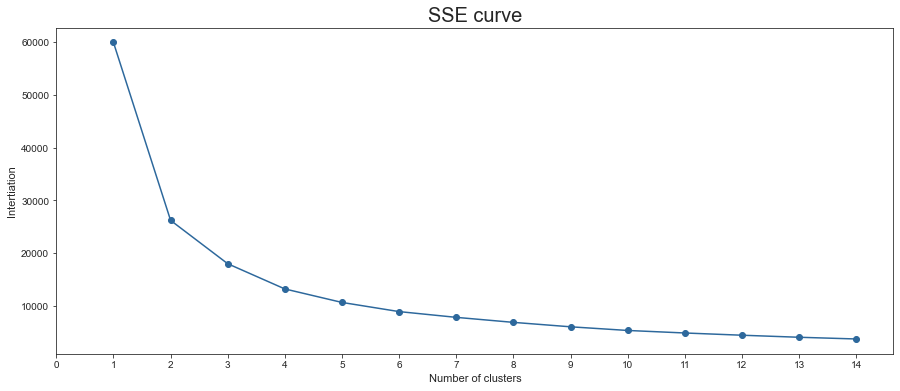

In [9]:
intertia = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_final)
    intertia.append(km.inertia_)

sns.set_style("ticks")
plt.figure(figsize =(15, 6))
plt.plot(K, intertia, marker= "o",color='#2D689C')
plt.title('SSE curve',fontsize=20)
plt.xlabel('Number of clusters',fontsize=11)
plt.ylabel('Intertiation',fontsize=11)
plt.xticks(np.arange(15))
plt.savefig('31.png')
plt.show()

In [10]:
#how many clusters? elbow method
sse = []
for k in range(2, 10):
    model = KMeans(n_clusters=k, max_iter= 300, random_state= 42)
    model.fit(df_final)
    sse.append(model.inertia_)
kl = KneeLocator(range(2, 10), sse, curve="convex", direction="decreasing")
print('Ideal cluster number is:', kl.elbow)

Ideal cluster number is: 4


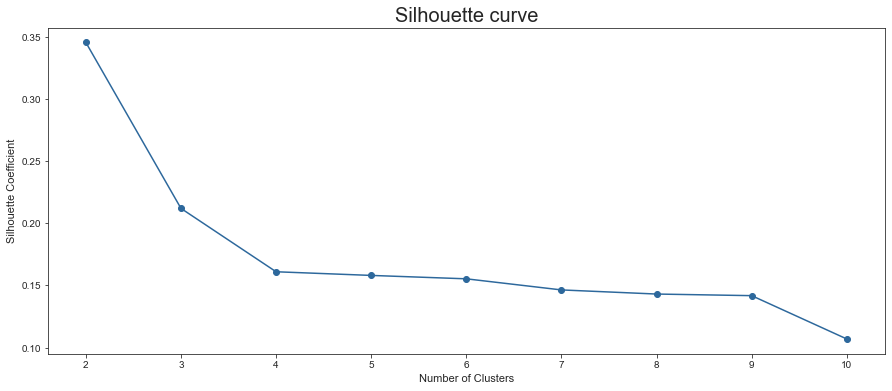

In [239]:
#silhouette curve
silhouette_coefficients = []
for k in range(2, 11):
    model = KMeans(n_clusters=k)
    model.fit(df_final)
    score1 = silhouette_score(df_scaled, model.labels_)
    silhouette_coefficients.append(score1)
    
plt.figure(figsize =(15, 6))
plt.plot(range(2, 11), silhouette_coefficients, marker= "o",color='#2D689C')
plt.xticks(range(2, 11))
plt.title("Silhouette curve", fontsize = 20)
plt.xlabel("Number of Clusters",fontsize = 11)
plt.ylabel("Silhouette Coefficient",fontsize = 11)
plt.savefig('32.png')
plt.show()

In [11]:
model = KMeans(init="random",n_clusters=4,n_init=10,max_iter=300,random_state=42)
model.fit(df_final)

KMeans(init='random', n_clusters=4, random_state=42)

In [12]:
y_kmeans = model.predict(df_final)
df_final['cluster'] = y_kmeans
df_final.head()

,component1,component2,cluster
0,0.334689,0.943114,2
1,2.200999,0.055365,2
2,-1.464508,0.248004,3
3,-1.570545,-0.765223,3
4,-1.635361,-1.347890,3


In [13]:
df_final['cluster'].unique()

array([2, 3, 1, 0], dtype=int32)

In [14]:
#score
labels = model.labels_
silhouette1 = metrics.silhouette_score(df_final, labels, metric = 'euclidean')
print('Silhouette score is:',round(silhouette1,2))

Silhouette score is: 0.54


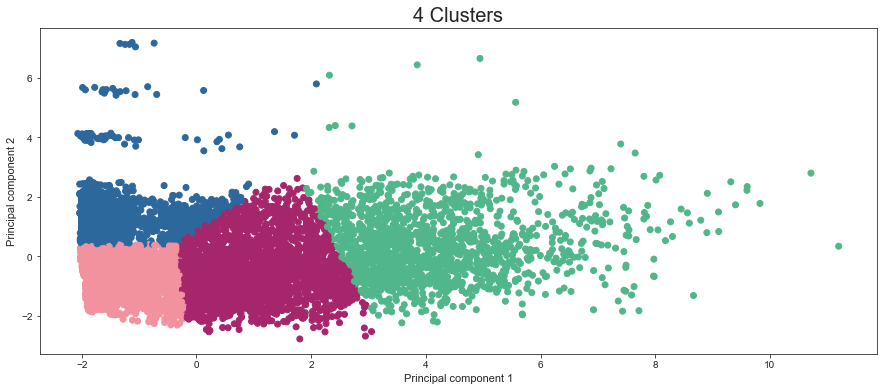

In [15]:
plt.figure(figsize=(15, 6))
fte_colors = {0: "#51B689",1: "#2D689C",2: "#A6266C", 3: "#F2929E"}
km_colors = [fte_colors[label] for label in model.labels_]

plt.scatter(df_final['component1'], df_final['component2'], c=km_colors)
plt.title("4 Clusters", fontsize = 20)
plt.xlabel("Principal component 1",fontsize = 11)
plt.ylabel("Principal component 2",fontsize = 11)
plt.savefig('33.png')
plt.show()

In [16]:
model = KMeans(init="random",n_clusters=7,n_init=10,max_iter=300,random_state=42)
model.fit(df_final)

KMeans(init='random', n_clusters=7, random_state=42)

In [17]:
y_kmeans = model.predict(df_final)
df_final['cluster'] = y_kmeans
df_final.head()

,component1,component2,cluster
0,0.334689,0.943114,0
1,2.200999,0.055365,2
2,-1.464508,0.248004,1
3,-1.570545,-0.765223,1
4,-1.635361,-1.347890,1


In [18]:
df_final['cluster'].unique()

array([0, 2, 1, 6, 5, 3, 4], dtype=int32)

In [19]:
#score
labels = model.labels_
kmeans_silhouette = metrics.silhouette_score(df_final, labels, metric = 'euclidean')
print('Silhouette score is:',round(kmeans_silhouette,2))

Silhouette score is: 0.63


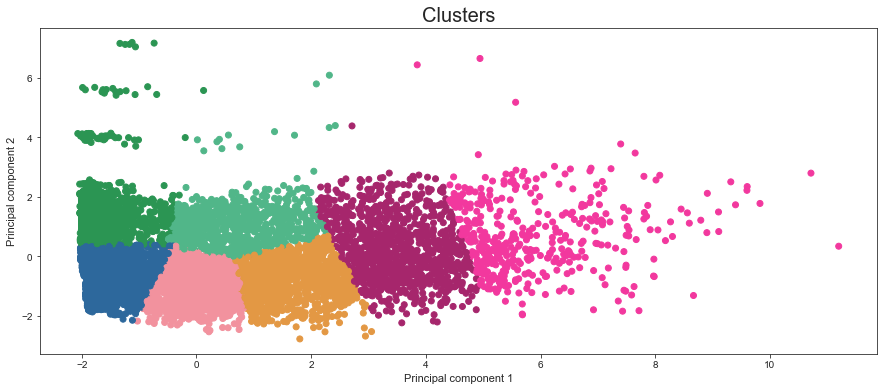

In [20]:
plt.figure(figsize=(15, 6))
fte_colors = {0: "#51B689",1: "#2D689C",2: "#E39844", 3: "#F2929E",
              4: "#F2389E",5: "#A6266C",6: "#2B9553"}
km_colors = [fte_colors[label] for label in model.labels_]

plt.scatter(df_final['component1'], df_final['component2'], c=km_colors)

plt.title("Clusters", fontsize = 20)
plt.xlabel("Principal component 1",fontsize = 11)
plt.ylabel("Principal component 2",fontsize = 11)
plt.savefig('34.png')
plt.show()

In [21]:
df_final['cluster'].value_counts()

1    3115
6    1893
3    1562
2    1076
5    1048
0     805
4     419
Name: cluster, dtype: int64

In [22]:
df_final.head()

,component1,component2,cluster
0,0.334689,0.943114,0
1,2.200999,0.055365,2
2,-1.464508,0.248004,1
3,-1.570545,-0.765223,1
4,-1.635361,-1.347890,1


In [107]:
df1['cluster']= df_final['cluster']
df1.head(5)

,skin_id,type_id,rarest_rank,total_att,last_price,num_sold_trans,total_sold_trans,num_trans,highest_price,last_prices_diff,date_diff,cluster
0,6,3,2118,3,25.0,3.0,27.58,40,25.0,23.4,1137.0,0
1,4,4,4337,2,60.0,3.0,91.42,63,60.0,29.0,406.0,2
2,5,3,7995,1,0.0,0.0,0.00,30,0.0,0.0,1662.0,1
3,4,4,7834,3,0.0,0.0,0.00,17,0.0,0.0,1662.0,1
4,6,4,7189,4,0.0,0.0,0.00,12,0.0,0.0,1662.0,1


In [109]:
conditions = [(df1['cluster'] == 0),
              (df1['cluster'] == 1),
              (df1['cluster'] == 2),
              (df1['cluster'] == 3),
              (df1['cluster'] == 4),
              (df1['cluster'] == 5),
              (df1['cluster'] == 6)]

values = [1, 2, 3, 4, 5, 6, 7]
df1['cluster'] = np.select(conditions, values)

In [110]:
df1.head(5)

,skin_id,type_id,rarest_rank,total_att,last_price,num_sold_trans,total_sold_trans,num_trans,highest_price,last_prices_diff,date_diff,cluster
0,6,3,2118,3,25.0,3.0,27.58,40,25.0,23.4,1137.0,1
1,4,4,4337,2,60.0,3.0,91.42,63,60.0,29.0,406.0,3
2,5,3,7995,1,0.0,0.0,0.00,30,0.0,0.0,1662.0,2
3,4,4,7834,3,0.0,0.0,0.00,17,0.0,0.0,1662.0,2
4,6,4,7189,4,0.0,0.0,0.00,12,0.0,0.0,1662.0,2


In [111]:
df1.groupby(['cluster']).mean()

,skin_id,type_id,rarest_rank,total_att,last_price,num_sold_trans,total_sold_trans,num_trans,highest_price,last_prices_diff,date_diff
cluster,,,,,,,,,,,
1,4.559006,3.115528,2629.836025,2.751553,40.725876,2.400000,64.964907,24.161491,41.943876,7.515851,260.634783
2,4.945746,3.809952,6177.643018,2.742215,0.408632,0.407384,0.476164,6.105939,0.438276,0.012559,1483.943820
3,4.939591,3.852230,6225.772305,2.826208,49.937110,4.307621,98.423104,31.026952,51.791245,13.727407,181.902416
4,4.980794,3.832266,6620.403969,2.814341,16.935551,2.508963,28.238291,17.497439,18.530992,2.630333,314.407170
5,4.579952,3.663484,4136.780430,2.727924,149.160310,6.167064,350.364916,55.386635,152.579379,70.147041,118.279236
6,4.798664,3.604008,4949.597328,2.833015,104.514151,4.291985,208.000401,35.730916,106.857500,40.453359,119.594466
7,4.408347,3.066033,2388.564712,2.652932,0.792641,0.333862,0.885837,7.675119,0.809672,0.065536,1533.519282


In [112]:
df1.groupby(['cluster','type_id'])['type_id'].count()

cluster  type_id
1        1             2
         2            11
         3           684
         4           108
2        3           592
         4          2523
3        3           159
         4           917
4        3           262
         4          1300
5        1             2
         2             1
         3           133
         4           283
6        2             1
         3           413
         4           634
7        0             6
         1            16
         2            54
         3          1588
         4           229
Name: type_id, dtype: int64

In [113]:
df1.groupby(['cluster','skin_id'])['skin_id'].count()

cluster  skin_id
1        1             2
         2            11
         3           106
         4           284
         5           220
         6           182
2        3           237
         4           785
         5          1003
         6          1090
3        3            69
         4           300
         5           334
         6           373
4        3            95
         4           399
         5           509
         6           559
5        1             2
         2             1
         3            60
         4           135
         5           131
         6            90
6        2             1
         3           107
         4           315
         5           304
         6           321
7        0             6
         1            16
         2            54
         3           336
         4           592
         5           489
         6           400
Name: skin_id, dtype: int64

In [114]:
df1.groupby(['cluster','total_att'])['total_att'].count()

cluster  total_att
1        0               2
         1              22
         2             284
         3             372
         4             118
         5               5
         6               2
2        1             128
         2            1110
         3            1372
         4             450
         5              52
         6               3
3        1              10
         2             364
         3             522
         4             163
         5              17
4        1              13
         2             528
         3             771
         4             236
         5              14
5        0               1
         1              13
         2             161
         3             183
         4              46
         5              15
6        1              10
         2             373
         3             478
         4             159
         5              26
         6               1
         7               1
7        

In [115]:
df1['last_prices_diff'].min()

-130.0

In [116]:
df_a= df1 [df1['last_prices_diff'] < 0]
len(df_a)

501

In [117]:
df_b= df1[df1['last_prices_diff'] == 0]
len(df_b)

5590

In [118]:
df_c= df1[df1['last_prices_diff'] > 0]
len(df_c)

3827

In [119]:
df['last_prices_diff'].max()

238.5

In [120]:
df_c['cluster'].value_counts()

4    938
6    885
3    848
1    480
5    385
2    192
7     99
Name: cluster, dtype: int64

In [121]:
df1.head()

,skin_id,type_id,rarest_rank,total_att,last_price,num_sold_trans,total_sold_trans,num_trans,highest_price,last_prices_diff,date_diff,cluster
0,6,3,2118,3,25.0,3.0,27.58,40,25.0,23.4,1137.0,1
1,4,4,4337,2,60.0,3.0,91.42,63,60.0,29.0,406.0,3
2,5,3,7995,1,0.0,0.0,0.00,30,0.0,0.0,1662.0,2
3,4,4,7834,3,0.0,0.0,0.00,17,0.0,0.0,1662.0,2
4,6,4,7189,4,0.0,0.0,0.00,12,0.0,0.0,1662.0,2


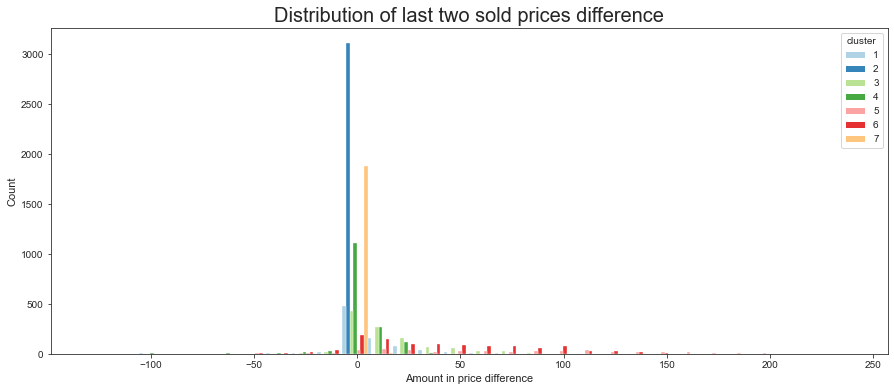

In [122]:
fig = plt.figure(figsize = (15,6))
sns.histplot(x='last_prices_diff', data=df1, kde=False , edgecolor="w", alpha=.9, hue='cluster',
             bins=30, palette="Paired", multiple='dodge')
plt.title("Distribution of last two sold prices difference",fontsize=20)
plt.xlabel("Amount in price difference",fontsize=11)
plt.ylabel("Count",fontsize=11)
plt.savefig('41.png')
plt.show()

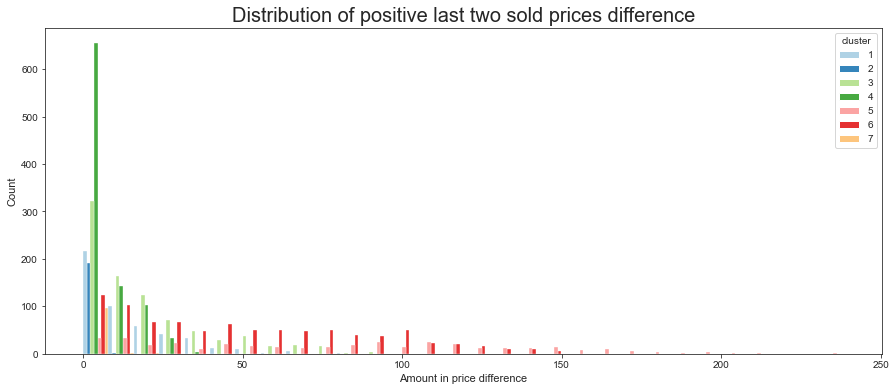

In [123]:
fig = plt.figure(figsize = (15,6))
labels = ['1','2','3','4','5','6','7']
sns.histplot(x='last_prices_diff', data=df_c, kde=False , edgecolor="w", alpha=.9, hue = 'cluster',
             bins=30, palette="Paired", multiple='dodge')
plt.title("Distribution of positive last two sold prices difference",fontsize=20)
plt.xlabel("Amount in price difference",fontsize=11)
plt.ylabel("Count",fontsize=11)
plt.savefig('42.png')
plt.show()